# Øving 9 TMA4135

In [47]:
%matplotlib inline

from numpy import *
from numpy.linalg import solve, norm
from matplotlib.pyplot import *
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

## Oppgave 1

In [48]:
def simpson(f, a, b, m=10):
    n = 2 * m
    x_noder = linspace(a, b, n + 1) 
    h = (b - a) / n
    S1 = f(x_noder[0]) + f(x_noder[n])
    S2 = sum(f(x_noder[1:n:2]))       
    S3 = sum(f(x_noder[2:n - 1:2]))     
    S = h * (S1 + 4 * S2 + 2 * S3) / 3
    return S

In [49]:
def approximate_for_different_h(f, a, b, exact):
    # Approksimerer for forskjellige verdier av h
    n = 1
    h = (b - a ) / n
    steps = []
    errors = []
    Nmax = 10
    for k in range(Nmax):
        numres = simpson(f, a, b, n)
        eh = abs(exact - numres)
        print(f'h = {h:8.2e},   T(h) = {numres:10.8f},   e(h) = {eh:8.2e}')
        steps.append(h)
        errors.append(eh)
        n = 2 * n
        h = (b - a) / n

    # Finn orden og feilkonstant C
    print('\nP sin orden og konstanten C')
    for k in range(1, Nmax-1):
        p = log(errors[k+1]/errors[k])/log(steps[k+1]/steps[k])
        C = errors[k+1]/steps[k+1]**p
        print(f'h = {steps[k]:8.2e},  p = {p:4.2f},  C = {C:6.4f}')

    # Plott det hele
    clf()
    loglog(steps, errors, 'o-')
    xlabel('h')
    ylabel('e(h)')
    title('Plott av feilen for Simpsons regel')
    grid(True)

### Oppgave 1 a)

h = 2.00e+00,   T(h) = 0.78346746,   e(h) = 4.77e-02
h = 1.00e+00,   T(h) = 0.73913060,   e(h) = 3.37e-03
h = 5.00e-01,   T(h) = 0.73597650,   e(h) = 2.18e-04
h = 2.50e-01,   T(h) = 0.73577259,   e(h) = 1.37e-05
h = 1.25e-01,   T(h) = 0.73575974,   e(h) = 8.59e-07
h = 6.25e-02,   T(h) = 0.73575894,   e(h) = 5.37e-08
h = 3.12e-02,   T(h) = 0.73575889,   e(h) = 3.36e-09
h = 1.56e-02,   T(h) = 0.73575888,   e(h) = 2.10e-10
h = 7.81e-03,   T(h) = 0.73575888,   e(h) = 1.31e-11
h = 3.91e-03,   T(h) = 0.73575888,   e(h) = 8.19e-13

P sin orden og konstanten C
h = 1.00e+00,  p = 3.95,  C = 0.0034
h = 5.00e-01,  p = 3.99,  C = 0.0035
h = 2.50e-01,  p = 4.00,  C = 0.0035
h = 1.25e-01,  p = 4.00,  C = 0.0035
h = 6.25e-02,  p = 4.00,  C = 0.0035
h = 3.12e-02,  p = 4.00,  C = 0.0035
h = 1.56e-02,  p = 4.00,  C = 0.0035
h = 7.81e-03,  p = 4.00,  C = 0.0035


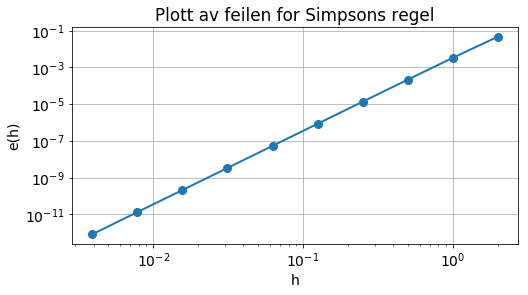

In [50]:
# Funksjonen som tilnærmes
def f1(x):
    return x * exp(x)

# Integrasjonsintervall og eksakt løsning
a, b = -1, 1
exact = 2 / exp(1)

# Selve approksimeringen og plottingen
approximate_for_different_h(f1, a, b, exact)


##### Konklusjon
Man kan se av den første tabellen at når man halverer størrelsen på h så minker `e(h)` sånn ca med 1/16 del altså `1 / 2 ** 4`, som betyr at `p = 4`, hvilket viser det vi ville vise. Ser også at plottet av `e(h)` med logaritmiske akser gir en lineær graf.

### Oppgave 1 b)

h = 2.00e+00,   T(h) = 1.33333333,   e(h) = 4.42e-01
h = 1.00e+00,   T(h) = 1.63540364,   e(h) = 1.40e-01
h = 5.00e-01,   T(h) = 1.72886020,   e(h) = 4.66e-02
h = 2.50e-01,   T(h) = 1.75945841,   e(h) = 1.60e-02
h = 1.25e-01,   T(h) = 1.76989907,   e(h) = 5.60e-03
h = 6.25e-02,   T(h) = 1.77353123,   e(h) = 1.97e-03
h = 3.12e-02,   T(h) = 1.77480571,   e(h) = 6.94e-04
h = 1.56e-02,   T(h) = 1.77525467,   e(h) = 2.45e-04
h = 7.81e-03,   T(h) = 1.77541312,   e(h) = 8.66e-05
h = 3.91e-03,   T(h) = 1.77546909,   e(h) = 3.06e-05

P sin orden og konstanten C
h = 1.00e+00,  p = 1.59,  C = 0.1401
h = 5.00e-01,  p = 1.54,  C = 0.1356
h = 2.50e-01,  p = 1.52,  C = 0.1316
h = 1.25e-01,  p = 1.51,  C = 0.1290
h = 6.25e-02,  p = 1.50,  C = 0.1274
h = 3.12e-02,  p = 1.50,  C = 0.1265
h = 1.56e-02,  p = 1.50,  C = 0.1260
h = 7.81e-03,  p = 1.50,  C = 0.1257


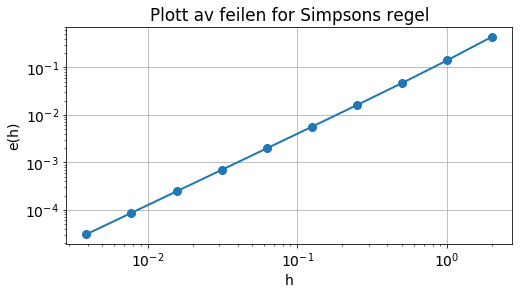

In [51]:
# Funksjonen som tilnærmes
def f2(x):
    return sqrt(1 - x ** 2) * exp(x)

# Integrasjonsintervall og eksakt løsning
a, b = -1, 1
exact = 1.7754996892121809469

# Selve approksimeringen og plottingen
approximate_for_different_h(f2, a, b, exact)


#### Plott av integrandene

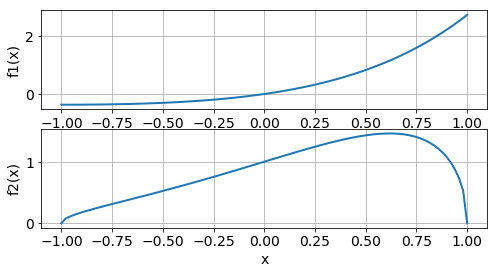

In [52]:
x = linspace(a, b, 101)

# Plott av funksjonen gitt i a)
subplot(2,1,1)                  
plot(x, f1(x))
xlabel('x')
ylabel('f1(x)')

# Plott av funksjonen gitt i b)
subplot(2,1,2)
plot(x, f2(x))
xlabel('x')
ylabel('f2(x)');


##### Konklusjon
Ser at p er av størrelsesorden 1.5, kontra 4 i sted, noe som er mye dårligere.

### Oppgave 3 a)

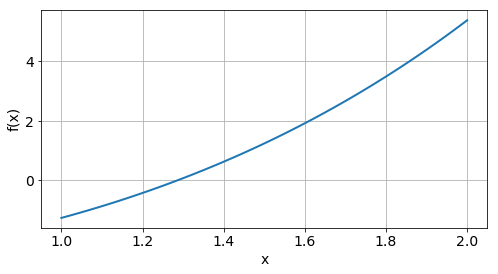

In [53]:
def f(x):
    return exp(x) + x**2 - x - 4

x = linspace(1, 2, 101)
plot(x, f(x))
xlabel('x')
ylabel('f(x)');

##### Numerisk løsning

In [54]:
def newton(f, df, x0, tol=1.e-8, max_iter=30):
    x = x0
    print('k ={:3d}, x = {:18.15f}, f(x) = {:10.3e}'.format(0, x, f(x)))
    for k in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:
            break 
        x = x - fx/df(x)
        print('k ={:3d}, x = {:18.15f}, f(x) = {:10.3e}'.format(k+1, x, f(x)))
    return x, k+1

In [55]:
def f(x):
    return exp(x) + x ** 2 - x - 4

def df(x):
    return exp(x) + 2 * x - 1

x_0 = 1.3

x, k = newton(f, df, x_0)

print(f'\nNewton gjorde {k} iterasjoner og fikk {x:.4f} som tilnærmet løsning.')

k =  0, x =  1.300000000000000, f(x) =  5.930e-02
k =  1, x =  1.288746758560088, f(x) =  3.581e-04
k =  2, x =  1.288677969382023, f(x) =  1.332e-08
k =  3, x =  1.288677966823868, f(x) = -4.441e-16

Newton gjorde 4 iterasjoner og fikk 1.2887 som tilnærmet løsning.


### Oppgave 3 b)

In [56]:
def fixpoint(g, x0, tol=1.e-8, max_iter=30):
    x = x0
    print('k ={:3d}, x = {:14.10f}'.format(0, x))  
    for k in range(max_iter):        
        x_old = x                        # Store old values for error estimation 
        x = g(x)                         # The iteration
        err = abs(x - x_old)               # Error estimate
        print('k ={:3d}, x = {:14.10f}'.format(k + 1, x))
        if err < tol:          # The solution is accepted 
            break
    return x, k+1

In [57]:
def g1(x):
    return log(4 + x - x ** 2)

def g2(x):
    return sqrt(-exp(x) + x + 4)

def g3(x):
    return exp(x + x ** 2 - 4)


gs = [g1, g2, g3]
# x_0 = 1.2886779694
x_0 = 1.5


for i, g in enumerate(gs, start=1):

    print(f'\nFunction {i}:')
    x, k = fixpoint(g, x_0)



Function 1:
k =  0, x =   1.5000000000
k =  1, x =   1.1786549963
k =  2, x =   1.3322149248
k =  3, x =   1.2690350905
k =  4, x =   1.2970764687
k =  5, x =   1.2850003170
k =  6, x =   1.2902719159
k =  7, x =   1.2879840175
k =  8, x =   1.2889795000
k =  9, x =   1.2885468343
k = 10, x =   1.2887349735
k = 11, x =   1.2886531806
k = 12, x =   1.2886887430
k = 13, x =   1.2886732816
k = 14, x =   1.2886800038
k = 15, x =   1.2886770812
k = 16, x =   1.2886783519
k = 17, x =   1.2886777994
k = 18, x =   1.2886780396
k = 19, x =   1.2886779352
k = 20, x =   1.2886779806
k = 21, x =   1.2886779608
k = 22, x =   1.2886779694

Function 2:
k =  0, x =   1.5000000000
k =  1, x =   1.0091139329
k =  2, x =   1.5053054929
k =  3, x =   0.9998878264
k =  4, x =   1.5105995169
k =  5, x =   0.9905322092
k =  6, x =   1.5158710552
k =  7, x =   0.9810634053
k =  8, x =   1.5211088914
k =  9, x =   0.9714992449
k = 10, x =   1.5263017049
k = 11, x =   0.9618589916
k = 12, x =   1.5314381740
k 

##### Konklusjon:
Både funksjon 1 og 3 konvergerer for startverdi `x = 1.5`, men funksjon nummer 3 konvergerer mot en verdi for x som ikke er en løsning for `f(x)`. Funksjon 2 ser man hopper mellom `≈1.5` og `≈1.0`, og ser ikke ut til å konvergere noen gang.

### Oppgave 4 c)

In [58]:
# Den inverse funksjonen til arccos(x)
def g(x):
    return cos(x)

x_0 = 0.739

x, k = fixpoint(g, x_0)

k =  0, x =   0.7390000000
k =  1, x =   0.7391424773
k =  2, x =   0.7390465043
k =  3, x =   0.7391111535
k =  4, x =   0.7390676054
k =  5, x =   0.7390969401
k =  6, x =   0.7390771799
k =  7, x =   0.7390904906
k =  8, x =   0.7390815244
k =  9, x =   0.7390875642
k = 10, x =   0.7390834957
k = 11, x =   0.7390862363
k = 12, x =   0.7390843902
k = 13, x =   0.7390856337
k = 14, x =   0.7390847961
k = 15, x =   0.7390853603
k = 16, x =   0.7390849802
k = 17, x =   0.7390852363
k = 18, x =   0.7390850638
k = 19, x =   0.7390851800
k = 20, x =   0.7390851017
k = 21, x =   0.7390851544
k = 22, x =   0.7390851189
k = 23, x =   0.7390851428
k = 24, x =   0.7390851267
k = 25, x =   0.7390851376
k = 26, x =   0.7390851303


Med fikspunktmetoden får jeg fikspunkt for `x = 0.7390851303` for `cos(x)`, som betyr at den inverse, `arccos(x)`, også har fikspunkt i samme punkt.

### Oppgave 5

In [59]:
set_printoptions(precision=15)

In [60]:
def newton_system(f, jac, x0, tol = 1.e-10, max_iter=20):
    x = x0
    print('k ={:3d}, x = '.format(0), x)
    for k in range(max_iter):
        fx = f(x)
        if norm(fx, inf) < tol:
            break
        Jx = jac(x)
        delta = solve(Jx, -fx) 
        x = x + delta
        print('k ={:3d}, x = '.format(k+1), x)
    return x, k + 1

#### Oppgave 5 b)

In [61]:
def f(x):               
    return array([x[0]**2 + x[1]**2 - 4, 
                  x[0] * x[1] - 1])

def jac(x):
    J = array(
        [[2 * x[0] + x[1]**2, x[0]**2 + 2 * x[1]],
         [x[1], x[0]]])
    return J

x0 = array([2.0, 0.0])
max_iter = 22
x, nit = newton_system(f, jac, x0, tol=1.e-12, max_iter=max_iter)

print(f'\nTest: f(x)={f(x)}')
if nit == max_iter:
    print('Advarsel: Konvergens ble ikke oppnådd')

k =  0, x =  [2. 0.]
k =  1, x =  [1.5 0.5]
k =  2, x =  [1.942307692307692 0.519230769230769]
k =  3, x =  [1.934954069472256 0.516817305114424]
k =  4, x =  [1.931072944087003 0.517844763641189]
k =  5, x =  [1.932048989612196 0.517585088122218]
k =  6, x =  [1.931800888907705 0.517651684094069]
k =  7, x =  [1.931864662472829 0.517634603673892]
k =  8, x =  [1.931848315185697 0.517638984421126]
k =  9, x =  [1.931852508501114 0.517637860858834]
k = 10, x =  [1.931851433050457 0.517638149027152]
k = 11, x =  [1.931851708881834 0.517638075118501]
k = 12, x =  [1.9318516381375   0.517638094074398]
k = 13, x =  [1.931851656281832 0.517638089212639]
k = 14, x =  [1.931851651628222 0.51763809045957 ]
k = 15, x =  [1.931851652821768 0.517638090139761]
k = 16, x =  [1.931851652515651 0.517638090221785]
k = 17, x =  [1.931851652594163 0.517638090200747]
k = 18, x =  [1.931851652574026 0.517638090206143]
k = 19, x =  [1.931851652579191 0.517638090204759]
k = 20, x =  [1.931851652577866 0.5176

##### Konklusjon
Numeriske beregninger bekrefter beregningene gjort på ark.

#### Oppgave 5 c)

In [62]:
def f(x):               
    return array([x[0]**2 + x[1]**2 - 2, 
                  x[0] * x[1] - 1])

def jac(x):
    J = array(
        [[2 * x[0] + x[1]**2, x[0]**2 + 2 * x[1]],
         [x[1], x[0]]])
    return J

x0 = array([2.0, 0.0])
max_iter = 40
x, nit = newton_system(f, jac, x0, tol=1.e-12, max_iter=max_iter)

print(f'\nTest: f(x)={f(x)}')
if nit == max_iter:
    print('Advarsel: Konvergens ble ikke oppnådd')

k =  0, x =  [2. 0.]
k =  1, x =  [1.  0.5]
k =  2, x =  [0.8 1.1]
k =  3, x =  [1.052054794520548 0.903424657534247]
k =  4, x =  [0.9080781203748   1.074157052863439]
k =  5, x =  [1.015813361106975 0.973787839927933]
k =  6, x =  [0.91997149397017  1.076309572835665]
k =  7, x =  [0.99213785239008  1.002560039785175]
k =  8, x =  [1.166995847331044 0.831229611538886]
k =  9, x =  [1.017170285381904 0.963619061909634]
k = 10, x =  [0.883667169914659 1.109594099541358]
k = 11, x =  [0.985455545920474 1.003835209434926]
k = 12, x =  [1.188988963675573 0.807429611873142]
k = 13, x =  [1.016927793067913 0.957895589443796]
k = 14, x =  [0.861732408970976 1.129540348644775]
k = 15, x =  [0.9806747464577 1.0045459839213]
k = 16, x =  [1.199114430653456 0.79594921285738 ]
k = 17, x =  [1.016349391048784 0.955264702124353]
k = 18, x =  [0.849399151070507 1.140829798762366]
k = 19, x =  [0.97764255070075  1.005058819674244]
k = 20, x =  [1.201804642214724 0.792420412073888]
k = 21, x =  [1.015

##### Konklusjon
Ser at metoden ikke konvergerer lenger. Dette kan forklares ved at den nye utvidede matriser for ligningssystemet vi ønsker å løse ikke lenger er av rang 2, men er av rang 1, hvilket betyr at løsningen ikke er entydig lenger.